In [1]:
import pandas as pd
import numpy as np
#from sklearn import linear_model
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../dataset/bankloan.csv')
print(df.head())
print(df.dtypes)

   ID  Age  Experience  Income  ZIP.Code  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49     91107       4    1.6          1         0   
1   2   45          19      34     90089       3    1.5          1         0   
2   3   39          15      11     94720       1    1.0          1         0   
3   4   35           9     100     94112       1    2.7          2         0   
4   5   35           8      45     91330       4    1.0          2         0   

   Personal.Loan  Securities.Account  CD.Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1  
ID                      int64
Age                     int64
Experience              int64
Inc

In [3]:
df = df.drop(['ID','Age','Experience','ZIP.Code', 'Family','Education','CCAvg','Mortgage','Personal.Loan' ,'Securities.Account', 'CD.Account','Online'], axis=1)  # Drop ID and ZIP.Code since they are identifiers
df

,Income,CreditCard
0,49,0
1,34,0
2,11,0
3,100,0
4,45,1
...,...,...
4995,40,0
4996,15,0
4997,24,0
4998,49,0


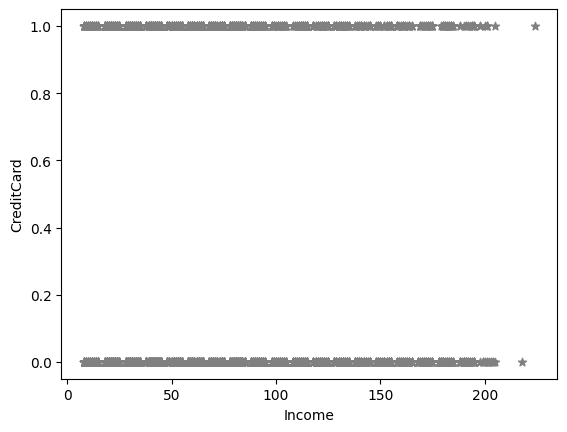

In [4]:
plt.xlabel('Income')
plt.ylabel('CreditCard')
plt.scatter(df.Income,df.CreditCard, color='gray',marker='*')

In [5]:
new_df=df.drop('CreditCard',axis='columns')
new_df

,Income
0,49
1,34
2,11
3,100
4,45
...,...
4995,40
4996,15
4997,24
4998,49


In [6]:
df

,Income,CreditCard
0,49,0
1,34,0
2,11,0
3,100,0
4,45,1
...,...,...
4995,40,0
4996,15,0
4997,24,0
4998,49,0


In [7]:
df_CreditCard=df['CreditCard']
df_CreditCard

0       0
1       0
2       0
3       0
4       1
       ..
4995    0
4996    0
4997    0
4998    0
4999    1
Name: CreditCard, Length: 5000, dtype: int64

In [8]:
# Create linear regression object
reg = LinearRegression()
reg.fit(new_df, df_CreditCard)

LinearRegression()

In [9]:
reg.predict([[104]])

D:\MachineLearning\pyvenvmain\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([0.29328647])

In [10]:
reg.coef_

array([-2.36065806e-05])

In [11]:
reg.intercept_

np.float64(0.2957415565996416)

In [12]:
107*(-0.01376281)+46.35374006373037

44.88111939373037

In [13]:
reg.predict([[120]])

D:\MachineLearning\pyvenvmain\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([0.29290877])

In [14]:
bestfit_point = df.Income*reg.coef_ + reg.intercept_
bestfit_point

0       0.294585
1       0.294939
2       0.295482
3       0.293381
4       0.294679
          ...   
4995    0.294797
4996    0.295387
4997    0.295175
4998    0.294585
4999    0.293782
Name: Income, Length: 5000, dtype: float64

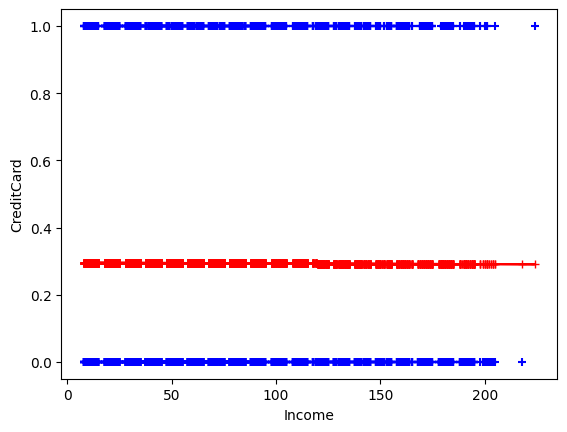

In [15]:
plt.xlabel('Income')
plt.ylabel('CreditCard')
plt.scatter(df.Income,df.CreditCard,color='blue',marker='+')
plt.plot(df.Income,bestfit_point,color='red',marker='+')

In [16]:
Income_df = df['Income']
Income_df

0        49
1        34
2        11
3       100
4        45
       ... 
4995     40
4996     15
4997     24
4998     49
4999     83
Name: Income, Length: 5000, dtype: int64

In [17]:
p = reg.predict(Income_df.values.reshape(-1, 1))
print(p)

[0.29458483 0.29493893 0.29548188 ... 0.295175   0.29458483 0.29378221]


D:\MachineLearning\pyvenvmain\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [20]:
import pandas as pd
df
CreditCard = df["CreditCard"]  # Extract the column
CreditCard

0       0
1       0
2       0
3       0
4       1
       ..
4995    0
4996    0
4997    0
4998    0
4999    1
Name: CreditCard, Length: 5000, dtype: int64

In [21]:
p = reg.predict(CreditCard.values.reshape(-1, 1))
print(p)

[0.29574156 0.29574156 0.29574156 ... 0.29574156 0.29574156 0.29571795]


D:\MachineLearning\pyvenvmain\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [22]:
Income_df['CreditCard']=p
Income_df

0                                                            49
1                                                            34
2                                                            11
3                                                           100
4                                                            45
                                    ...                        
4996                                                         15
4997                                                         24
4998                                                         49
4999                                                         83
CreditCard    [0.2957415565996416, 0.2957415565996416, 0.295...
Name: Income, Length: 5001, dtype: object

In [23]:
Income_df.to_csv('../dataset/prediction.csv')